<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>December 8 to 11, 2018: permutations, cycles and derangements
<br>December 3 and 4, 2018: types definitions, OGFs
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
In this document we collect a naive <i>type system</i> based on sets.
</div>

In [1]:
from sympy import *
#from type_system import *

In [2]:
%run ./type-system.py

---

In [3]:
init_printing()

In [4]:
x,y,m,n,t,z = symbols('x y m n t z')
alpha, beta, gamma, eta = symbols(r'\alpha \beta \gamma \eta')
f,g = Function('f'), Function('g')
w = IndexedBase('w')

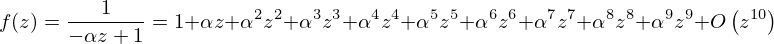

In [22]:
define(f(z), 1/(1-alpha*z), ctor=FEq).series(z,n=10)

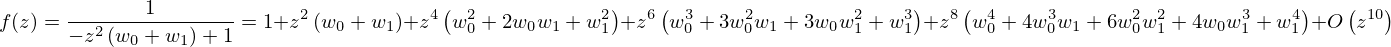

In [23]:
define(f(z), 1/(1-(w[0]+w[1])*z**2), ctor=FEq).series(z,n=10)

# Exponential gf recap

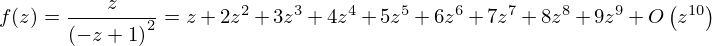

In [5]:
define(f(z), z*(1/(1-z))*(1/(1-z)), ctor=FEq).series(z,n=10,is_exp=False)

In [6]:
define(f(z), z**3,ctor=FEq).series(z, n=10, is_exp=True)

In [7]:
define(f(z), exp(z),ctor=FEq).series(z, n=10, is_exp=True)

In [8]:
define(f(z), z*exp(z), ctor=FEq).series(z, n=10, is_exp=True)

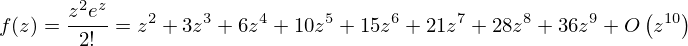

In [9]:
define(f(z), z**2*exp(z)/factorial(2,evaluate=False), 
       ctor=FEq).series(z, n=10, is_exp=True)

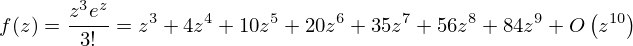

In [10]:
define(f(z), z**3*exp(z)/factorial(3, evaluate=False), 
       ctor=FEq).series(z, n=10, is_exp=True)

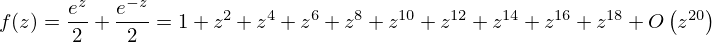

In [11]:
define(f(z), (exp(z)+exp(-z))/2, ctor=FEq).series(z, n=20, is_exp=True)

In [12]:
define(f(z), exp(m*z), ctor=FEq).series(z, n=10, is_exp=True)

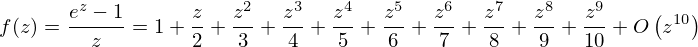

In [13]:
define(f(z), (exp(z)-1)/z, ctor=FEq).series(z, n=10, is_exp=True)

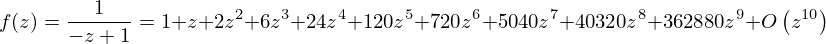

In [14]:
define(f(z), 1/(1-z), ctor=FEq).series(z, n=10, is_exp=True)

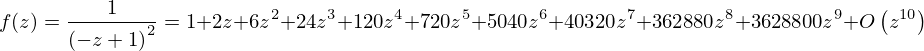

In [15]:
define(f(z), (1/(1-z))*(1/(1-z)), ctor=FEq).series(z, n=10,is_exp=True)

In [16]:
define(f(z), exp(z)**2, ctor=FEq).series(z, n=10, is_exp=True)

# Linear types

In [17]:
tyvar(x).gf()

In [18]:
(tyvar(x) * tyvar(y) * tyvar(z)).gf()

In [19]:
(tyvar(x) | tyvar(y) | tyvar(z)).gf()

In [20]:
truth, falsehood = tyvar(w[1]*z), tyvar(w[0]*z)

In [21]:
boolean = truth | falsehood

In [107]:
boolean.gf()

In [109]:
maybe(Alpha).gf()

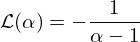

In [114]:
lst_of_alpha_gf, = lst(Alpha).gf()
lst_of_alpha_gf

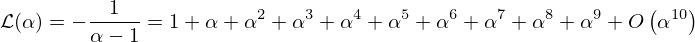

In [115]:
lst_of_alpha_gf.series(alpha, n=10)

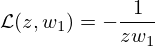

In [116]:
lst_of_maybe_of_alpha_gf, = lst(maybe(truth)).gf()
lst_of_maybe_of_alpha_gf

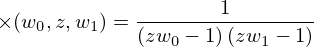

In [117]:
nats = (lst(truth) * lst(falsehood))
nats_gf, = nats.gf()
nats_gf

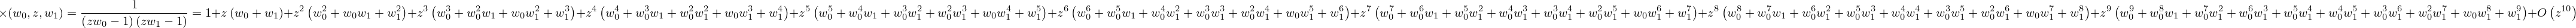

In [118]:
nats_gf.series(z, n=10)

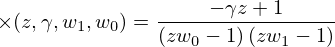

In [119]:
difference = (cp() | tyvar(-gamma*z))
ones = nats * difference
ones_gf, = ones.gf()
ones_gf

In [121]:
ones_gf(z,1,1,1).series(z, n=10) # check!

In [123]:
one_gf, = (ones * difference).gf()
one_gf.series(z, n=10).rhs.rhs.subs({w[0]:1, w[1]:1, gamma:1})

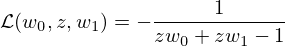

In [124]:
lst_of_boolean_gf, = lst(boolean).gf()
lst_of_boolean_gf

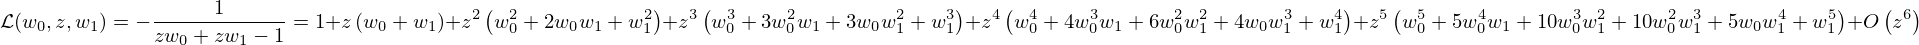

In [125]:
s = lst_of_boolean_gf.series(z)
s

In [126]:
lst_of_boolean_gf(1,z,1).series(z,n=10)

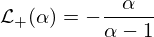

In [128]:
nnlst_of_alpha_gf, = nnlst(tyvar(alpha)).gf()
nnlst_of_alpha_gf

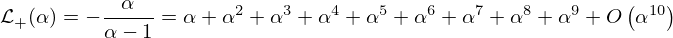

In [129]:
nnlst_of_alpha_gf.series(alpha, n=10)

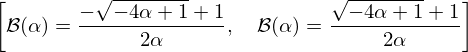

In [145]:
bin_tree_gfs = bin_tree(tyvar(alpha)).gf()
bin_tree_gfs

In [132]:
bin_tree_gf = bin_tree_gfs[0]

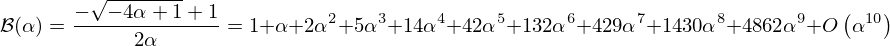

In [133]:
bin_tree_gf.series(alpha, n=10)

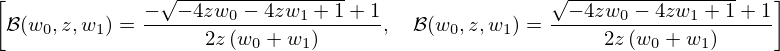

In [134]:
bin_tree_of_boolean_gfs = bin_tree(boolean).gf()
bin_tree_of_boolean_gfs

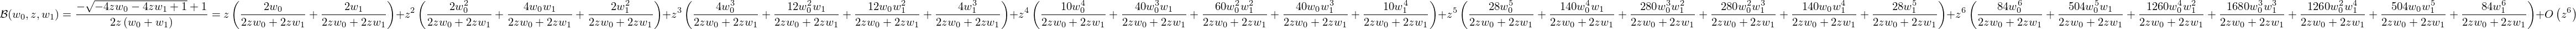

In [135]:
bin_tree_of_boolean_gf = bin_tree_of_boolean_gfs[0]
s = bin_tree_of_boolean_gf.series(z)
s

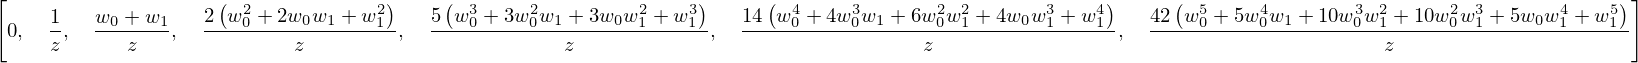

In [139]:
coeffs = [s.rhs.rhs.coeff(z,i).simplify() for i in range(7)]
coeffs

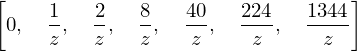

In [140]:
[c.subs({w[0]:1,w[1]:1}) for c in coeffs]

In [147]:
occupancy, = cp(*[maybe(tyvar(w[i]*z)) for i in range(3)]).gf()
occupancy

In [148]:
occupancy.series(z)

In [149]:
o = occupancy(1,z,1,1)
define(o, o.expand())

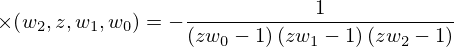

In [150]:
occupancy, = cp(*[lst(tyvar(w[i]*z)) for i in range(3)]).gf()
occupancy

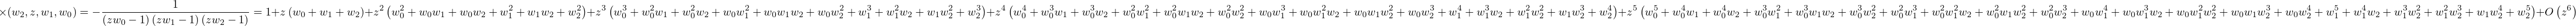

In [151]:
occupancy.series(z)

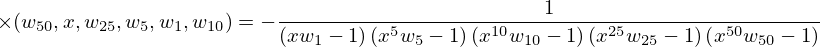

In [305]:
occupancy, = (lst(tyvar(w[1]*x)) * lst(tyvar(w[5]*x**5)) * lst(tyvar(w[10]*x**10)) * 
              lst(tyvar(w[25]*x**25)) * lst(tyvar(w[50]*x**50))).gf()
occupancy

In [ ]:
coins = occupancy.series(x, n=101)

In [311]:
coins.rhs.rhs.coeff(x,42)

In [364]:
assert 42 == coins.rhs.rhs.coeff(x,100).subs(
    {w[1]:1, w[5]:1, w[10]:1, w[25]:1, w[50]:1})

AssertionError: 

In [368]:
def sums_of_powers(boxes, base):
    return cp(*[cp() | tyvar(w[j]*x**(base**i)) 
                for i in range(0,boxes) 
                for j in [Pow(base,i,evaluate=False)]]).gf()

In [369]:
occupancy, = sums_of_powers(boxes=4, base=2)
occupancy.series(x, n=32)

In [352]:
occupancy, = sums_of_powers(boxes=4, base=3)
occupancy.series(x, n=100)

In [355]:
occupancy, = sums_of_powers(boxes=4, base=5)
occupancy.series(x, n=200)

In [358]:
occupancy, = sums_of_powers(boxes=4, base=7)
occupancy.series(x, n=500)

In [363]:
occupancy, = sums_of_powers(boxes=4, base=11)
occupancy.series(x, n=2000)

In [370]:
def linear_comb_of_powers(boxes, base):
    return cp(*[lst(tyvar(w[j]*x**(base**i)))
                for i in range(0,boxes) 
                for j in [Pow(base,i,evaluate=False)]]).gf()

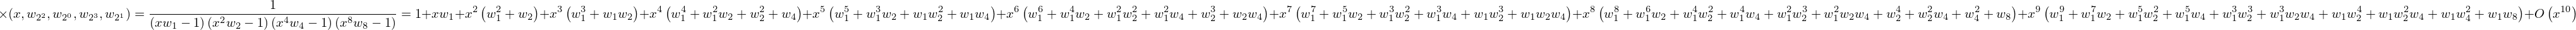

In [373]:
occupancy, = linear_comb_of_powers(boxes=4, base=2)
occupancy.series(x, n=10)

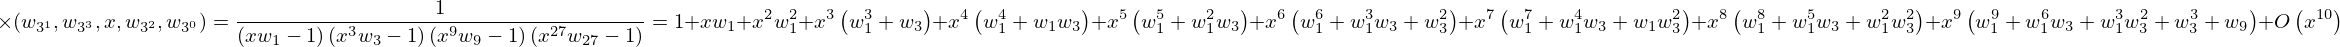

In [374]:
occupancy, = linear_comb_of_powers(boxes=4, base=3)
occupancy.series(x, n=10)

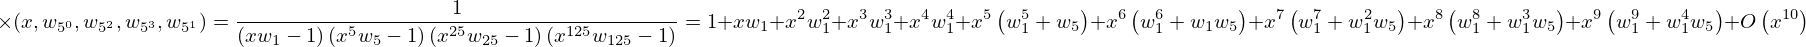

In [375]:
occupancy, = linear_comb_of_powers(boxes=4, base=5)
occupancy.series(x, n=10)

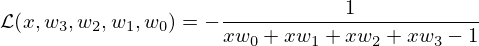

In [349]:
occupancy, = lst(tyvar(w[0]*x) | tyvar(w[1]*x) | tyvar(w[2]*x) | tyvar(w[3]*x)).gf()
occupancy

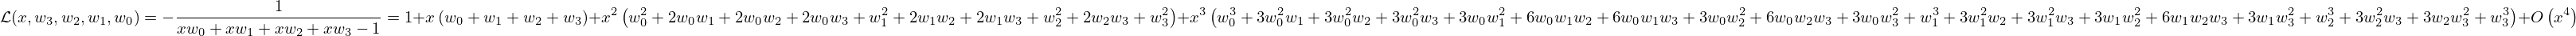

In [191]:
occupancy.series(x, n=4)

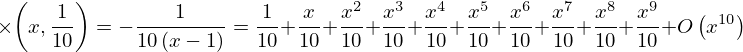

In [399]:
def uniform_rv(n):
    return tyvar(S(1)/nel) * lst(tyvar(x))
occupancy, = uniform_rv(n=10).gf()
occupancy.series(x,n=10)

In [394]:
class lst_structure_w(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | lst(me)
    
    def label(self):
        return r'\mathcal{L}_{w}' # `_s` stands for "structure"

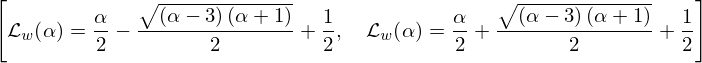

In [193]:
lst_structure_w(tyvar(alpha)).gf()

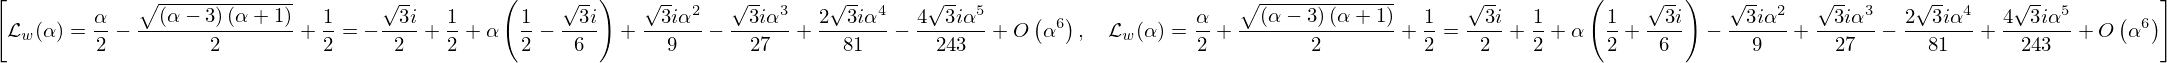

In [194]:
[gf.series(alpha) for gf in _]

In [195]:
class lst_structure(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | (lst(me) * me * me)
    
    def label(self):
        return r'\mathcal{L}_{s}' # `_s` stands for "structure"

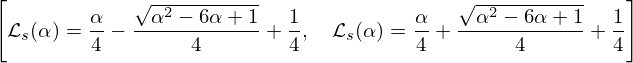

In [197]:
lst_structure(tyvar(alpha)).gf()

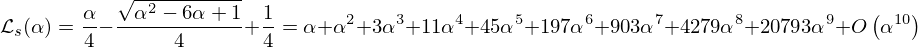

In [198]:
_[0].series(alpha, n=10)

In [199]:
class nnlst_structure(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha * lst(nnlst(me))
    
    def label(self):
        return r'\mathcal{L}_{s}^{+}' # `_s` stands for "structure"

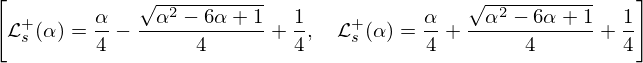

In [201]:
nnlst_structure(tyvar(alpha)).gf()

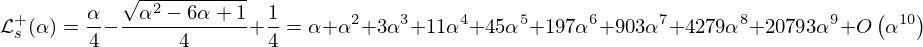

In [202]:
_[0].series(alpha, n=10)

In [203]:
class tree(rec):
         
    def definition(self, alpha):
        return alpha * lst(self.me())
    
    def label(self):
        return r'\mathcal{T}'

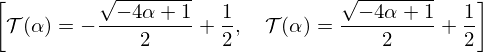

In [204]:
tree(tyvar(alpha)).gf()

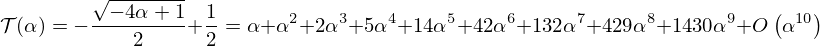

In [205]:
_[0].series(alpha, n=10)

In [206]:
class combination(rec):
         
    def definition(self, alpha):
        me = self.me()
        return alpha | (me * me)
    
    def label(self):
        return r'\mathcal{C}'

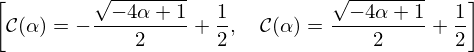

In [209]:
combination(tyvar(alpha)).gf()

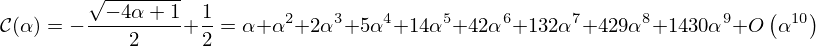

In [210]:
_[0].series(alpha, n=10)

In [211]:
class ab_tree(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return beta | (alpha * me * me)
    
    def label(self):
        return r'\mathcal{T}_{a,b}'

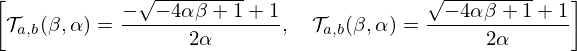

In [212]:
ab_tree_gfs = ab_tree(tyvar(alpha), tyvar(beta)).gf()
ab_tree_gfs

In [213]:
ab_tree_gf = ab_tree_gfs[0]

In [214]:
fab_eq = FEq(ab_tree_gf.lhs, ab_tree_gf.rhs.series(beta, n=20).removeO(), evaluate=False)
fab_eq

In [215]:
fab_eq(x,x)

In [216]:
(_*alpha).expand()

In [217]:
#with lift_to_Lambda(fab_eq) as F:
B = fab_eq(x,1)
A = fab_eq(1,x)
A,B,

In [218]:
(A+B).expand()

In [219]:
((1+x)*A).expand()

In [223]:
class dyck(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return cp() | (alpha * me * beta * me)
    
    def label(self):
        return r'\mathcal{D}'

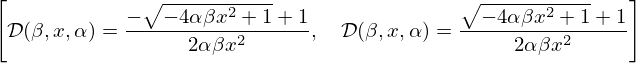

In [225]:
dyck_gfs = dyck(tyvar(alpha*x), tyvar(beta*x)).gf()
dyck_gfs

In [226]:
dyck_gf = dyck_gfs[0]

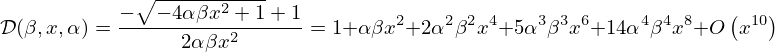

In [229]:
dyck_gf.series(x,n=10)

In [233]:
class motzkin(rec):
         
    def definition(self, alpha, beta, gamma):
        me = self.me()
        return cp() | (alpha * me * beta * me) | (gamma * me)
    
    def label(self):
        return r'\mathcal{M}'

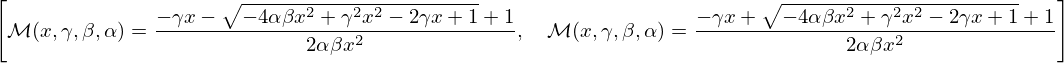

In [235]:
motzkin_gfs = motzkin(tyvar(alpha*x), tyvar(beta*x), tyvar(gamma*x),).gf()
motzkin_gfs

In [236]:
motzkin_gf = motzkin_gfs[0]

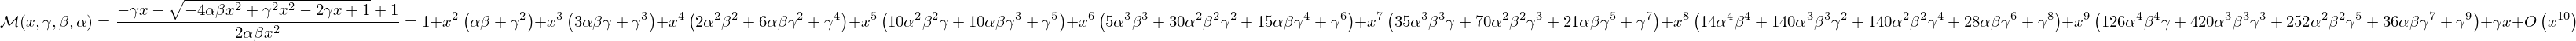

In [237]:
motzkin_gf.series(x,n=10)

In [238]:
motzkin_gf(x,1,1,1).series(x,n=10)

In [294]:
class motzkin_p(rec):
         
    def definition(self, alpha, beta, gamma, eta):
        me = self.me()
        return cp() | (alpha * me * beta * me) | (gamma * me) | (eta * me)
    
    def label(self):
        return r'\mathcal{M}^{+}'

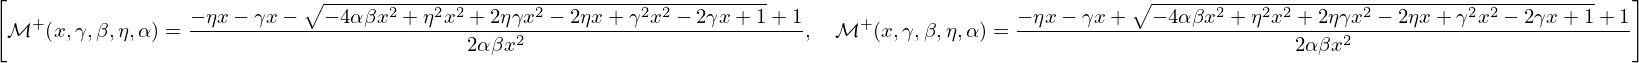

In [295]:
motzkinp_gfs = motzkin_p(tyvar(alpha*x), tyvar(beta*x), tyvar(gamma*x), tyvar(eta*x),).gf()
motzkinp_gfs

In [298]:
motzkinp_gf = motzkinp_gfs[0]

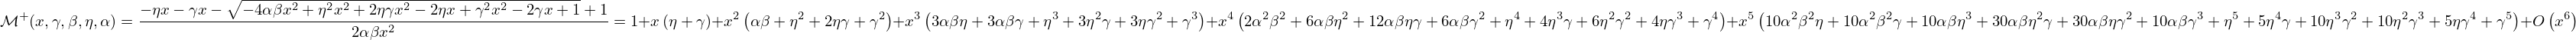

In [300]:
motzkinp_gf.series(x,n=6)

In [301]:
motzkinp_gf(x,1,1,1,1).series(x,n=10)

In [245]:
class fibo(rec):
         
    def definition(self, alpha, beta):
        me = self.me()
        return cp() | alpha | ((beta | (alpha * beta)) * me)
    
    def label(self):
        return r'\mathcal{F}'

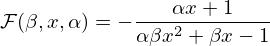

In [248]:
fibo_gf, = fibo(tyvar(alpha*x), tyvar(beta*x),).gf()
fibo_gf

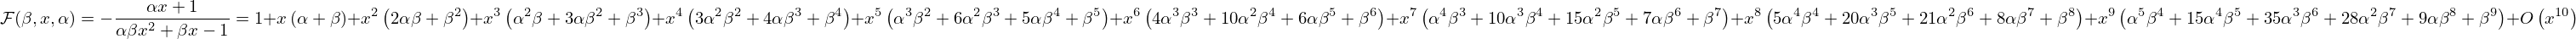

In [249]:
fibo_gf.series(x,n=10)

In [250]:
fibo_gf(1,x,1).series(x,n=10)

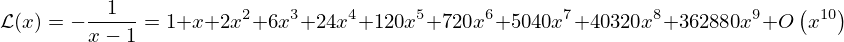

In [512]:
lst_of_truth_gf, = lst(tyvar(x)).gf()
lst_of_truth_gf.series(x, n=10, is_exp=True)

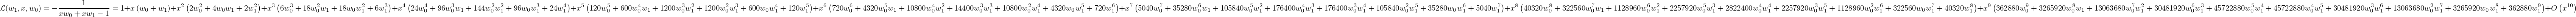

In [520]:
lst_of_boolean_gf.series(x,n=10,is_exp=True)

In [515]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

In [521]:
sum((_.rhs.rhs.coeff(x,i)/factorial(i))*x**i for i in range(1,10))

In [17]:
class powerset(ty):
        
    def gf_rhs(self, ty):
        return [exp(self.mulfactor() * gf.rhs) for gf in ty.gf()]
    
    def mulfactor(self):
        return 1
    
    def label(self):
        return r'\mathcal{P}'

In [478]:
powerset_of_tyvar_gf, = (2**(nnlst(tyvar(alpha)))).gf()
powerset_of_tyvar_gf

In [479]:
powerset_of_tyvar_gf.series(alpha, n=10, is_exp=True)

In [480]:
powerset_of_tyvar_gf, = (2**(nnlst(boolean))).gf()
powerset_of_tyvar_gf

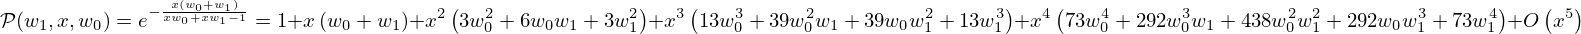

In [481]:
powerset_of_tyvar_gf.series(x, n=5, is_exp=True)

In [421]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

In [273]:
powerset_of_tyvar_gf, _ = (2**(bin_tree(tyvar(alpha)))).gf()
powerset_of_tyvar_gf

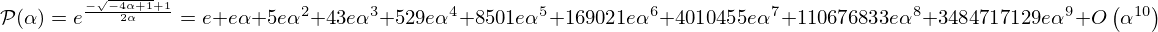

In [274]:
powerset_of_tyvar_gf.series(alpha, n=10, is_exp=True)

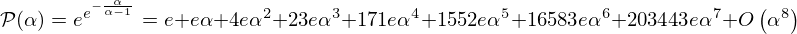

In [288]:
l, = (2**(2**(nnlst(tyvar(alpha))))).gf()
define(l.lhs, l.rhs.ratsimp(), ctor=FEq).series(alpha,n=8,is_exp=True)

In [494]:
class cycle(ty):
         
    def gf_rhs(self, ty):
        return [log(gf.rhs) for gf in ty.gf()]
    
    def label(self):
        return r'\mathcal{C}'

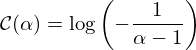

In [501]:
cycle_of_tyvar_gf, = (~(lst(tyvar(alpha)))).gf()
cycle_of_tyvar_gf

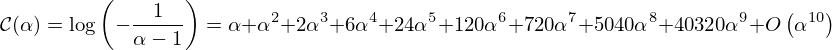

In [502]:
cycle_of_tyvar_gf.series(alpha, n=10, is_exp=True)

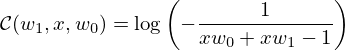

In [506]:
cycle_of_tyvar_gf, = (~(lst(boolean))).gf()
cycle_of_tyvar_gf

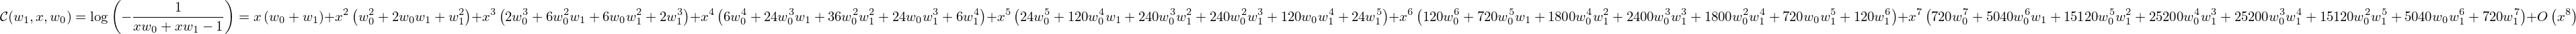

In [507]:
cycle_of_tyvar_gf.series(x, n=8, is_exp=True)

In [508]:
_.rhs.rhs.subs({w[0]:1,w[1]:1})

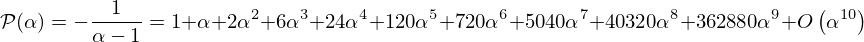

In [524]:
Pstar_gf, = (2**(~(lst(tyvar(alpha))))).gf()
Pstar_gf.series(alpha, n=10, is_exp=True)

In [542]:
class ipowerset(powerset):
    
    def mulfactor(self):
        return -1

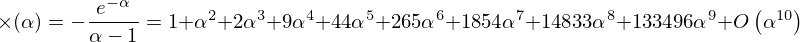

In [545]:
derangements_gf, = ((-2)**tyvar(alpha)).gf()
derangements_gf.series(alpha, n=10, is_exp=True)

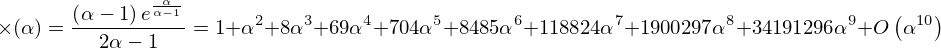

In [549]:
derangements_gf, = ((-2)**nnlst(tyvar(alpha))).gf()
derangements_gf.series(alpha, n=10, is_exp=True)

In [38]:
[1,2][1:]

In [45]:
def foldr(f, l, i):
    if not l:
        return i
    else:
        car, *cdr = l
        return f(car, foldr(f, cdr, i))
    
class arrow(ty):
    
    def label(self):
        return r'\rightarrow'
        
    def gf_rhs(self, alpha, beta):
        v = Dummy()
        return [foldr(lambda gf, acc: Lambda([x], acc(gf.rhs)), 
                      gfs[:-1], 
                      Lambda([x], gfs[-1].rhs))(x)
                for gfs in self.gfs_space()]
        return [foldr(lambda gf, acc: acc**gf.rhs, gfs[:-1], gfs[-1].rhs)
                for gfs in self.gfs_space()]

In [46]:
arr, = arrow(boolean, boolean).gf()
arr

In [49]:
arr.series(x,n=5,is_exp=False)

In [50]:
_.rhs.rhs.removeO().subs({w[0]:1,w[1]:1})

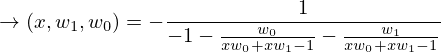

In [51]:
arr, = arrow(lst(boolean), lst(boolean)).gf()
arr

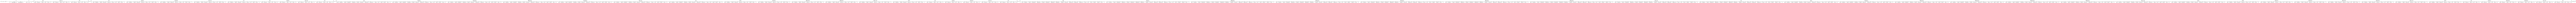

In [56]:
arr.series(x,n=5,is_exp=False)

In [57]:
_.rhs.rhs.removeO().subs({w[0]:1,w[1]:1})

---

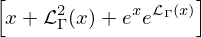

In [293]:
lamda_gf = lamda(tyvar(x)).gf_rhs(tyvar(x))
lamda_gf

In [112]:
lamda_gf.rhs.series(x,n=10)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.